In [145]:
import yfinance as yf
yf.pdr_override()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader as pdr

In [146]:
pdr.famafrench.get_available_datasets()

['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily',
 'Portfolios_Formed_on_ME',
 'Portfolios_Formed_on_ME_Wout_Div',
 'Portfolios_Formed_on_ME_Daily',
 'Portfolios_Formed_on_BE-ME',
 'Portfolios_Formed_on_BE-ME_Wout_Div',
 'Portfolios_Formed_on_BE-ME_Daily',
 'Portfolios_Formed_on_OP',
 'Portfolios_Formed_on_OP_Wout_Div',
 'Portfolios_Formed_on_OP_Daily',
 'Portfolios_Formed_on_INV',
 'Portfolios_Formed_on_INV_Wout_Div',
 'Portfolios_Formed_on_INV_Daily',
 '6_Portfolios_2x3',
 '6_Portfolios_2x3_Wout_Div',
 '6_Portfolios_2x3_weekly',
 '6_Portfolios_2x3_daily',
 '25_Portfolios_5x5',
 '25_Portfolios_5x5_Wout_Div',
 '25_Portfolios_5x5_Daily',
 '100_Portfolios_10x10',
 '100_Portfolios_10x10_Wout_Div',
 '100_Portfolios_10x10_Daily',
 '6_Portfolios_ME_OP_2x3',
 '6_Portfolios_ME_OP_2x3_Wout_Div',
 '6_Portfolios_ME_OP_2x3_daily',
 '25_Portfolios_ME_OP_5x5',
 '25_Portf

In [147]:
start = '1926-01-01'
ff = pdr.famafrench.FamaFrenchReader('F-F_Research_Data_Factors', freq='M', start=start).read()

In [148]:
ff_df = ff[0]

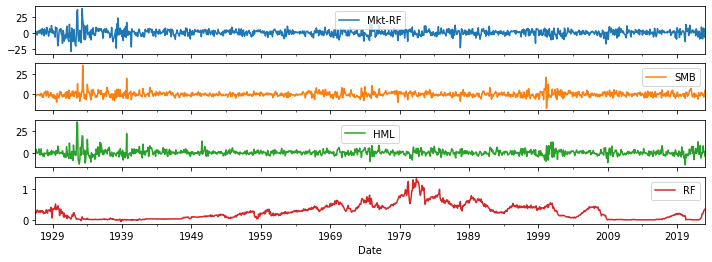

In [149]:
ff_df.plot(subplots=True, figsize=(12,4));

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

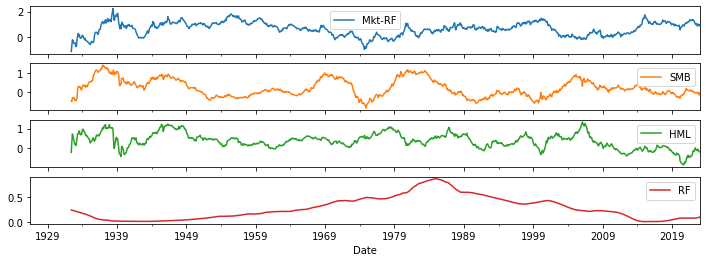

In [150]:
ff_df.rolling(72).mean().plot(subplots=True, figsize=(12,4))

In [151]:
ff_mom_df = pdr.famafrench.FamaFrenchReader('F-F_Momentum_Factor', freq='M',start=start).read()[0]

array([<AxesSubplot:xlabel='Date'>], dtype=object)

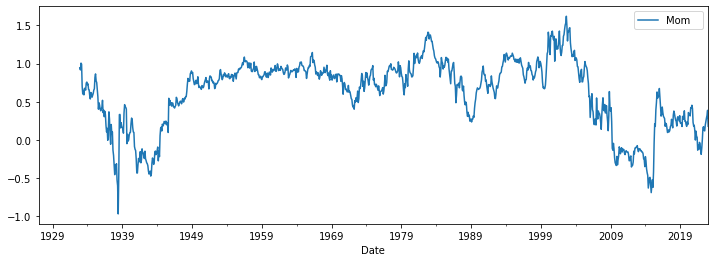

In [152]:
ff_mom_df.rolling(72).mean().plot(subplots=True, figsize=(12,4))

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

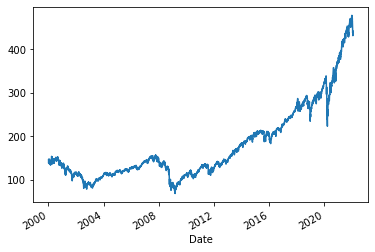

In [153]:
ticker = "SPY"
stock_data = yf.download(ticker, start='2000-01-01',end='2022-01-31')['Close']
stock_data.plot()

In [154]:
ffac_merged_df = pd.merge(ff_df, ff_mom_df,on='Date',how='inner', sort=True,copy=True, indicator=False, validate='one_to_one')

In [155]:
ffac_merged_df = pd.merge(ff_df, ff_mom_df, on='Date',how='inner', sort=True, copy=True, indicator=False, validate='one_to_one')

In [156]:
ffac_merged_df

,Mkt-RF,SMB,HML,RF,Mom
Date,,,,,
1927-01,-0.06,-0.37,4.54,0.25,0.36
1927-02,4.18,0.04,2.94,0.26,-2.14
1927-03,0.13,-1.65,-2.61,0.30,3.61
1927-04,0.46,0.30,0.81,0.25,4.30
1927-05,5.44,1.53,4.73,0.30,3.00
...,...,...,...,...,...
2022-09,-9.35,-0.79,0.06,0.19,3.47
2022-10,7.83,0.09,8.05,0.23,3.87
2022-11,4.60,-3.40,1.38,0.29,-2.01


In [157]:
AAPL_df = pdr.data.get_data_yahoo('AAPL', start=start)['Adj Close'].resample('M').ffill().pct_change()

[*********************100%***********************]  1 of 1 completed


In [158]:
AAPL_df = pd.DataFrame(AAPL_df)
AAPL_df

,Adj Close
Date,
1980-12-31 00:00:00-05:00,NaN
1981-01-31 00:00:00-05:00,-0.172163
1981-02-28 00:00:00-05:00,-0.061943
1981-03-31 00:00:00-05:00,-0.075475
1981-04-30 00:00:00-04:00,0.158162
...,...
2022-11-30 00:00:00-05:00,-0.033027
2022-12-31 00:00:00-05:00,-0.122272
2023-01-31 00:00:00-05:00,0.110521


In [159]:
AAPL_df.index.dtype
AAPL_df.reset_index(inplace=True)

In [160]:
#AAPL_df['str_date'] = AAPL_df.index.astype(str)

AAPL_df['Date'] = pd.to_datetime(AAPL_df['Date']).dt.strftime('%Y-%m')
AAPL_df.set_index('Date', inplace=True)

In [193]:
AAPL_df['str_date'] = AAPL_df.index.astype(str)
AAPL_df['dt_date'] = pd.to_datetime(AAPL_df['str_date']).dt.strftime('%Y-%m')
AAPL_df.dt_date.dtype

dtype('O')

In [194]:
ffac_merged_df['str_date'] = ffac_merged_df.index.astype(str)
ffac_merged_df['dt_date'] = pd.to_datetime(ffac_merged_df['str_date']).dt.strftime('%Y-%m')
ffac_merged_df.dt_date.dtype

dtype('O')

In [196]:
AAPL_ffac_merge_df = pd.merge(AAPL_df, ffac_merged_df, how='inner', on='dt_date', sort=True, copy=True, indicator=False, validate='one_to_one')
#AAPL_ffac_merge_df = pd.concat([AAPL_df, ffac_merged_df])
AAPL_ffac_merge_df

,Adj Close,str_date_x,dt_date,Mkt-RF,SMB,HML,RF,Mom,str_date_y
0,NaN,1980-12,1980-12,-4.52,-0.26,2.79,1.31,-6.68,1980-12
1,-0.172163,1981-01,1981-01,-5.04,2.92,6.72,1.04,-7.95,1981-01
2,-0.061943,1981-02,1981-02,0.57,-0.34,1.02,1.07,-1.35,1981-02
3,-0.075475,1981-03,1981-03,3.56,3.54,0.64,1.21,0.74,1981-03
4,0.158162,1981-04,1981-04,-2.11,4.40,2.28,1.08,-0.91,1981-04
...,...,...,...,...,...,...,...,...,...
501,-0.120977,2022-09,2022-09,-9.35,-0.79,0.06,0.19,3.47,2022-09
502,0.109551,2022-10,2022-10,7.83,0.09,8.05,0.23,3.87,2022-10
503,-0.033027,2022-11,2022-11,4.60,-3.40,1.38,0.29,-2.01,2022-11
504,-0.122272,2022-12,2022-12,-6.41,-0.68,1.32,0.33,4.52,2022-12


In [198]:
AAPL_ffac_merge_df.drop(columns=['str_date_x','str_date_y'], inplace=True)

In [199]:
AAPL_ffac_merge_df.rename(columns={'Adj Close':'AAPL'}, inplace=True)

In [200]:
AAPL_ffac_merge_df['AAPL_RF'] = AAPL_ffac_merge_df['AAPL']*100-AAPL_ffac_merge_df['RF']

In [201]:
AAPL_ffac_merge_df.head()

,AAPL,dt_date,Mkt-RF,SMB,HML,RF,Mom,AAPL_RF
0,NaN,1980-12,-4.52,-0.26,2.79,1.31,-6.68,NaN
1,-0.172163,1981-01,-5.04,2.92,6.72,1.04,-7.95,-18.256286
2,-0.061943,1981-02,0.57,-0.34,1.02,1.07,-1.35,-7.264335
3,-0.075475,1981-03,3.56,3.54,0.64,1.21,0.74,-8.757482
4,0.158162,1981-04,-2.11,4.40,2.28,1.08,-0.91,14.736244


In [203]:
AAPL_ffac_merge_df.dropna(axis=0,inplace=True)

In [204]:
AAPL_ffac_merge_df

,AAPL,dt_date,Mkt-RF,SMB,HML,RF,Mom,AAPL_RF
1,-0.172163,1981-01,-5.04,2.92,6.72,1.04,-7.95,-18.256286
2,-0.061943,1981-02,0.57,-0.34,1.02,1.07,-1.35,-7.264335
3,-0.075475,1981-03,3.56,3.54,0.64,1.21,0.74,-8.757482
4,0.158162,1981-04,-2.11,4.40,2.28,1.08,-0.91,14.736244
5,0.167398,1981-05,0.11,2.00,-0.42,1.15,3.70,15.589764
...,...,...,...,...,...,...,...,...
501,-0.120977,2022-09,-9.35,-0.79,0.06,0.19,3.47,-12.287705
502,0.109551,2022-10,7.83,0.09,8.05,0.23,3.87,10.725142
503,-0.033027,2022-11,4.60,-3.40,1.38,0.29,-2.01,-3.592749
504,-0.122272,2022-12,-6.41,-0.68,1.32,0.33,4.52,-12.557249


In [209]:
from statsmodels.api import OLS
results = OLS(AAPL_ffac_merge_df['AAPL_RF'],AAPL_ffac_merge_df[['Mkt-RF','SMB','HML','Mom']],missing='drop').fit()

KeyError: "['Mom'] not in index"

In [208]:
list(AAPL_ffac_merge_df)

['AAPL', 'dt_date', 'Mkt-RF', 'SMB', 'HML', 'RF', 'Mom   ', 'AAPL_RF']

In [212]:
AAPL_ffac_merge_df.rename(columns={'Mom   ':'Mom'},inplace=True)

In [213]:
from statsmodels.api import OLS
results = OLS(AAPL_ffac_merge_df['AAPL_RF'],AAPL_ffac_merge_df[['Mkt-RF','SMB','HML','Mom']],missing='drop').fit()

In [214]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                AAPL_RF   R-squared (uncentered):                   0.291
Model:                            OLS   Adj. R-squared (uncentered):              0.286
Method:                 Least Squares   F-statistic:                              51.52
Date:                Tue, 07 Mar 2023   Prob (F-statistic):                    2.45e-36
Time:                        11:15:51   Log-Likelihood:                         -1926.7
No. Observations:                 505   AIC:                                      3861.
Df Residuals:                     501   BIC:                                      3878.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         1.2735      0.115     11.100      0.000       1.048       1.499
SMB            0.2286      0.172      1.326      0.185      -0.110       0.567
HML           -0.8224      0.167     -4.933      0.000      -1.150      -0.495
Mom           -0.0443      0.116     -0.384      0.701      -0.271       0.183
==============================================================================
Omnibus:                       15.054   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               31.305
Skew:                          -0.054   Prob(JB):                     1.59e-07
Kurtosis:                       4.215   Cond. No.                         1.90
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [216]:
import statsmodels.tools
AAPL_ffac_merge_df_c = statsmodels.tools.add_constant(AAPL_ffac_merge_df, prepend=True)

In [217]:
AAPL_ffac_merge_df_c

,const,AAPL,dt_date,Mkt-RF,SMB,HML,RF,Mom,AAPL_RF
1,1.0,-0.172163,1981-01,-5.04,2.92,6.72,1.04,-7.95,-18.256286
2,1.0,-0.061943,1981-02,0.57,-0.34,1.02,1.07,-1.35,-7.264335
3,1.0,-0.075475,1981-03,3.56,3.54,0.64,1.21,0.74,-8.757482
4,1.0,0.158162,1981-04,-2.11,4.40,2.28,1.08,-0.91,14.736244
5,1.0,0.167398,1981-05,0.11,2.00,-0.42,1.15,3.70,15.589764
...,...,...,...,...,...,...,...,...,...
501,1.0,-0.120977,2022-09,-9.35,-0.79,0.06,0.19,3.47,-12.287705
502,1.0,0.109551,2022-10,7.83,0.09,8.05,0.23,3.87,10.725142
503,1.0,-0.033027,2022-11,4.60,-3.40,1.38,0.29,-2.01,-3.592749
504,1.0,-0.122272,2022-12,-6.41,-0.68,1.32,0.33,4.52,-12.557249


In [221]:
from statsmodels.api import OLS
results = OLS(AAPL_ffac_merge_df_c['AAPL_RF'],AAPL_ffac_merge_df_c[['const','Mkt-RF','SMB','HML','Mom']],missing='drop').fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                AAPL_RF   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     50.25
Date:                Tue, 07 Mar 2023   Prob (F-statistic):           1.49e-35
Time:                        11:19:26   Log-Likelihood:                -1922.7
No. Observations:                 505   AIC:                             3855.
Df Residuals:                     500   BIC:                             3877.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4310      0.504      2.838      0.005       0.440       2.422
Mkt-RF         1.2076      0.116     10.387      0.000       0.979       1.436
SMB            0.2200      0.171      1.285      0.199      -0.116       0.556
HML           -0.8993      0.168     -5.361      0.000      -1.229      -0.570
Mom           -0.1025      0.117     -0.880      0.379      -0.332       0.126
==============================================================================
Omnibus:                       14.299   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               28.934
Skew:                          -0.051   Prob(JB):                     5.21e-07
Kurtosis:                       4.168   Cond. No.                         5.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""